# Covid-19 Unemployemnt in USA - population analysis

In this notebook we analyze unemployment in Usa by inital claims,continued claims, Insured  unemployment rates, and  Average job postings(in second part) .

We compare all the states and its population in relation to other criteria's mentioned above.

In [223]:
import pandas as pd
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
from flask import Markup
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [307]:
#data source - United states department of labour https://oui.doleta.gov/unemploy/claims.asp
df = pd.read_csv('./data/unemp_claims.csv',sep="\t")
# group states together and taking mean values

#df_statewise
df.head()
df['Initial Claims'] = df['Initial Claims'].str.replace(',', '').astype(float)
df['Continued Claims'] = df['Continued Claims'].str.replace(',', '').astype(float)
df['Covered Employment'] = df['Covered Employment'].str.replace(',', '').astype(float)

df_statewise = df.groupby(['State']).sum().reset_index()

#merge population
df_state  = pd.read_csv('./data/EconomicTracker/data/GeoIDs - State.csv')
df_statewise = df_statewise.merge(df_state,left_on='State',right_on='statename')
df_statewise['population'] = df_statewise['state_pop2019']
df_statewise = df_statewise.drop(['state_pop2019'],axis=1)
#df_statewise


## Part 1: Unemployment claims - state aggregate

In [234]:
#df_statewise.head()

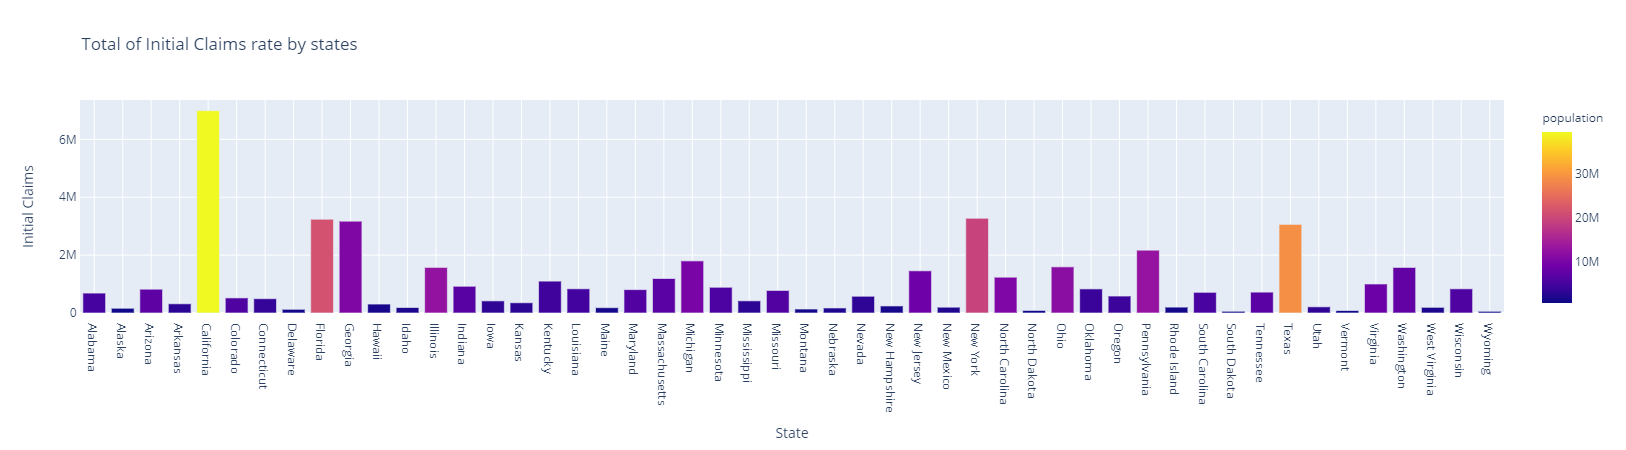

In [302]:
fig = px.bar(df_statewise,x='State',y='Initial Claims',title ="Total of Initial Claims rate by states",color='population')
fig.show()

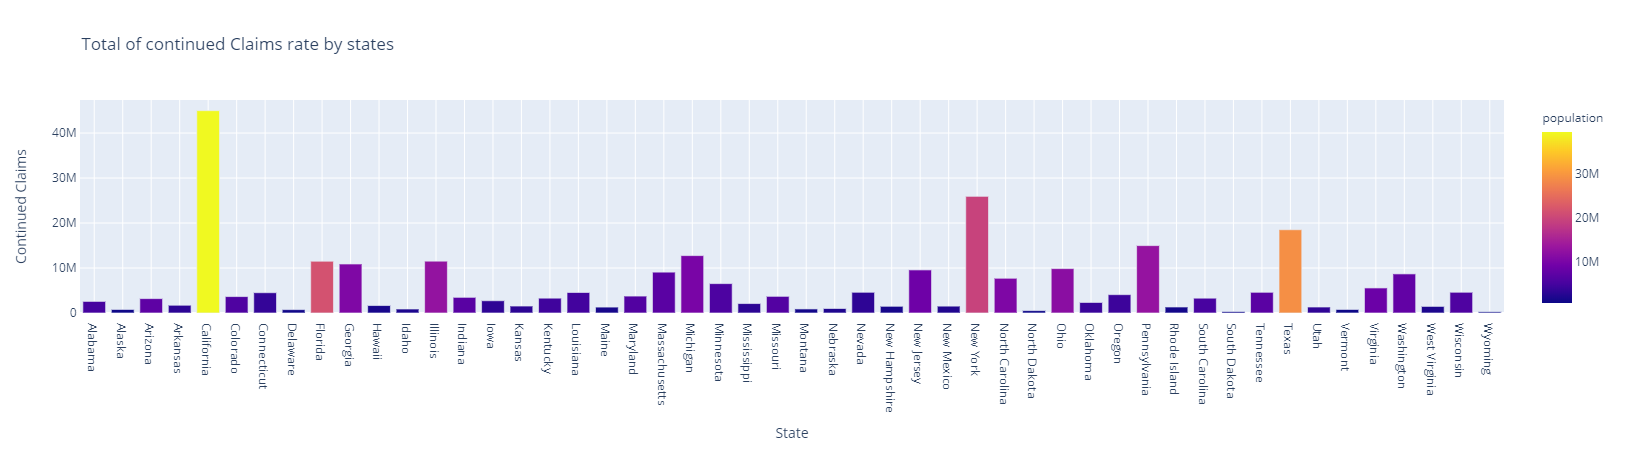

In [303]:
px.bar(df_statewise,x='State',y='Continued Claims',title ="Total of continued Claims rate by states",color='population')

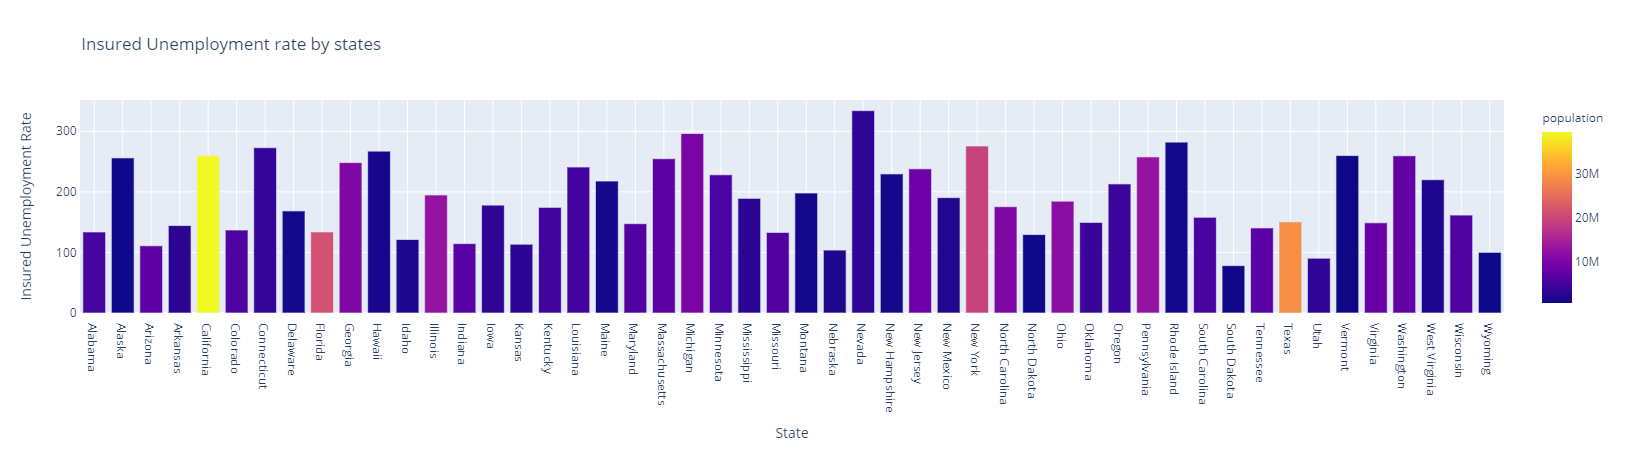

In [305]:
px.bar(df_statewise,x='State',y='Insured Unemployment Rate',title ="Insured Unemployment rate by states",color='population')

In [298]:
#px.line(df,x='Filed week ended',y='Initial Claims',hover_data=['State'],title='Time line of Initial Claims',color='State')

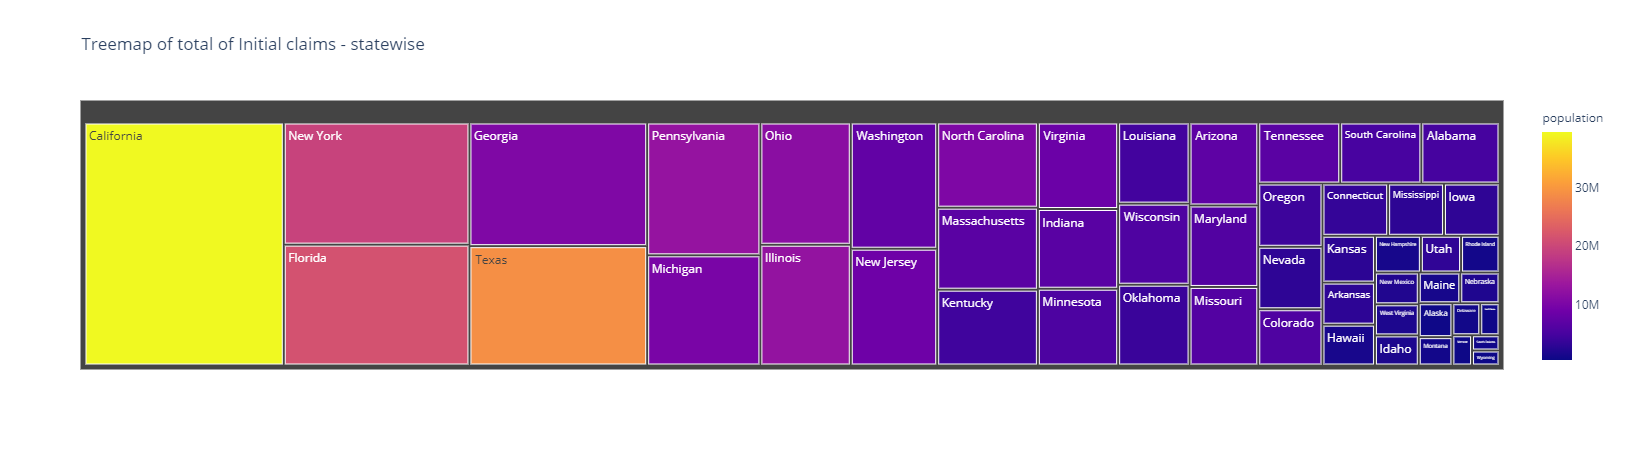

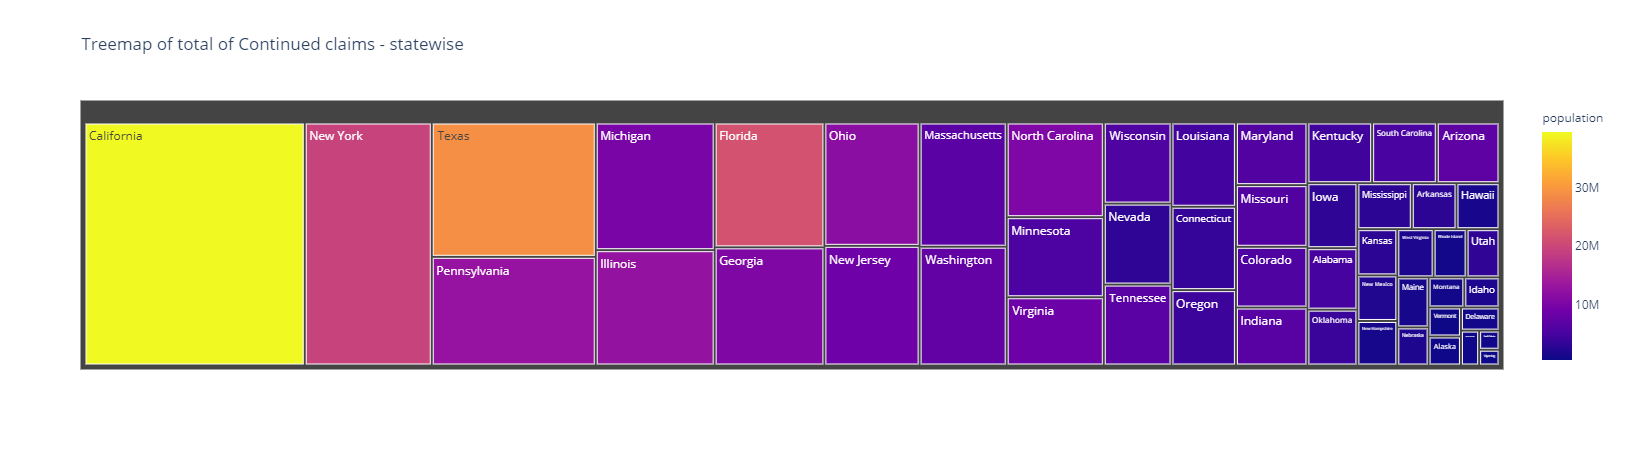

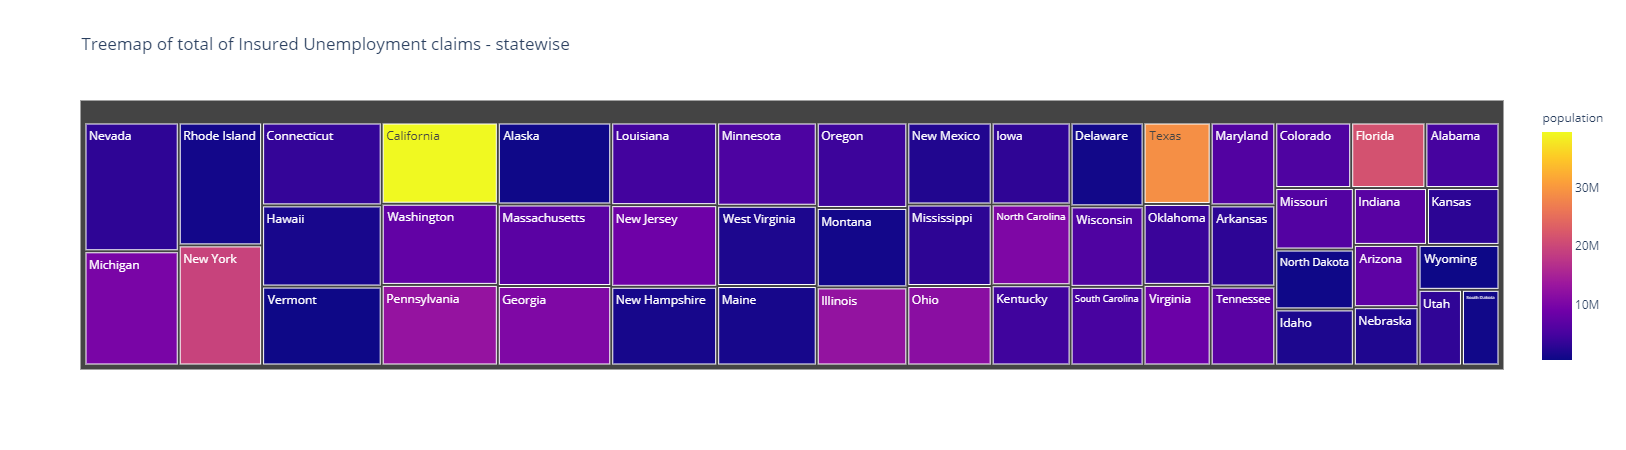

In [306]:
#color_continuous_scale=px.colors.sequential.Viridis
fig = px.treemap(df_statewise, path=['State'], values='Initial Claims',color='population',title="Treemap of total of Initial claims - statewise")
fig.show()
fig = px.treemap(df_statewise, path=['State'], values='Continued Claims',color='population',title="Treemap of total of Continued claims - statewise")
fig.show()
fig = px.treemap(df_statewise, path=['State'], values='Insured Unemployment Rate',color='population',title="Treemap of total of Insured Unemployment claims - statewise")
fig.show()

## Part 2 :Average Job postings

In [286]:
#data prep
df_state  = pd.read_csv('./data/EconomicTracker/data/GeoIDs - State.csv')
df_burning  = pd.read_csv('./data/EconomicTracker/data/Burning Glass - State - Weekly.csv')

df_burnings = df_burning.iloc[:,0:10]
df_burnings['day']=df_burnings['day_endofweek']
df_burnings['date'] = pd.to_datetime(df_burnings[['year', 'month', 'day']])
df_burnings = df_burnings.drop(['year','month','day_endofweek','day'],axis=1)
#df_burnings.columns

#rename
df_burnings.columns = ['statefips', 'all industries', 'manufacturing', 'financial activities',
       'professional and business services', 'education and health services', 'leisure and hospitality', 'date']
df_burnings
df_burnings = df_burnings.merge(df_state,on='statefips')

##statewise
df_burnings_state = df_burnings.groupby(['statename','stateabbrev']).mean().reset_index()
df_burnings_state['population'] = df_burnings_state['state_pop2019']
df_burnings_state = df_burnings_state.drop(['state_pop2019'],axis=1)
df_burnings_state.head()

#datewise
df_burnings_date = df_burnings.groupby(['date']).mean().reset_index()
#df_burnings_state['population'] = df_burnings_state['state_pop2019']
df_burnings_date = df_burnings_date.drop(['state_pop2019','statefips'],axis=1)

#date_state_wise
df_burnings_date_state = df_burnings.groupby(['date','statename','state_pop2019']).mean().reset_index()
df_burnings_date_state['population'] = df_burnings_date_state['state_pop2019']
df_burnings_date_state = df_burnings_date_state.drop(['state_pop2019'],axis=1)
df_burnings_date_state.head()

#df_burnings_state.head()

,date,statename,statefips,all industries,manufacturing,financial activities,professional and business services,education and health services,leisure and hospitality,population
0,2020-01-10,Alabama,1,0.0704,-0.1900,-0.0591,0.0335,-0.0633,-0.017700,4903185
1,2020-01-10,Alaska,2,-0.0357,-0.0659,-0.2580,0.1730,-0.1850,-0.092600,731545
2,2020-01-10,Arizona,4,-0.0271,-0.0747,-0.0708,-0.1000,0.0454,0.000415,7278717
3,2020-01-10,Arkansas,5,-0.1760,-0.0619,-0.0528,-0.0762,-0.2810,-0.341000,3017804
4,2020-01-10,California,6,-0.0934,-0.1590,-0.0742,-0.2050,-0.0998,-0.121000,39512223


### Timeline of Average job postings - Different industry comparision (relative to January 4-31 2020)

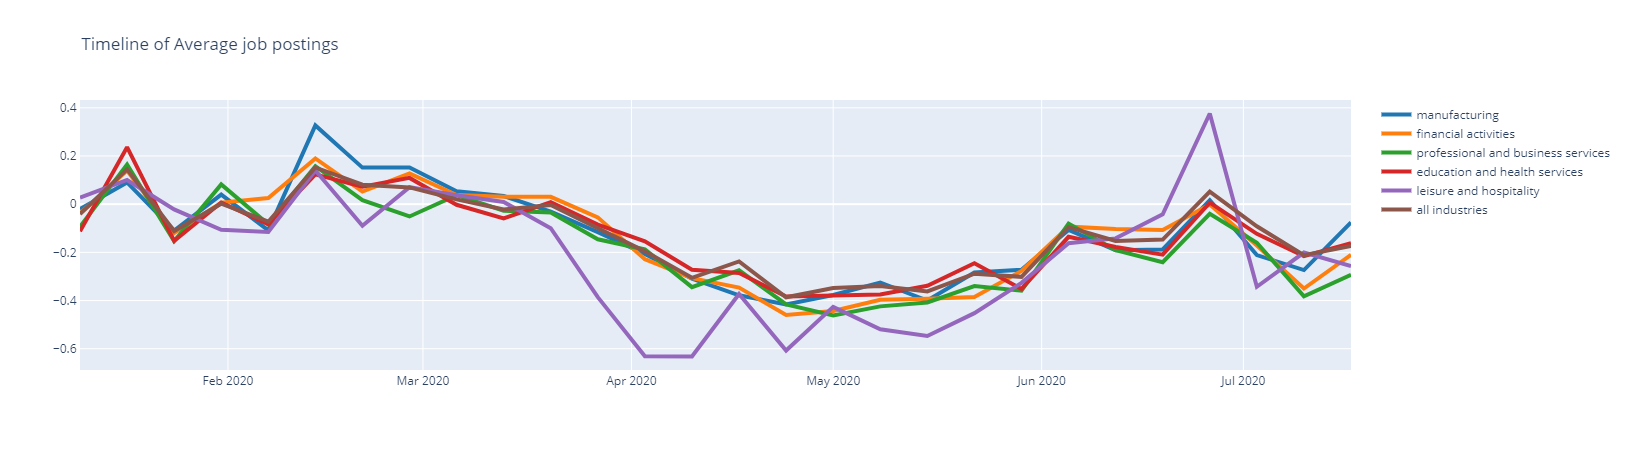

In [287]:
data = df_burnings_date
fig = go.Figure()
cols = plotly.colors.DEFAULT_PLOTLY_COLORS

# Create and style traces
fig.add_trace(go.Scatter(x=data['date'], y=data['manufacturing'], name='manufacturing',showlegend=True,
                         line=dict(color=cols[0], width=4)))

fig.add_trace(go.Scatter(x=data['date'], y=data['financial activities'], name='financial activities',showlegend=True,
                         line=dict(color=cols[1], width=4)))

fig.add_trace(go.Scatter(x=data['date'], y=data['professional and business services'], name='professional and business services',showlegend=True,
                         line=dict(color=cols[2], width=4)))

fig.add_trace(go.Scatter(x=data['date'], y=data['education and health services'], name='education and health services',showlegend=True,
                         line=dict(color=cols[3], width=4)))

fig.add_trace(go.Scatter(x=data['date'], y=data['leisure and hospitality'], name='leisure and hospitality',showlegend=True,
                         line=dict(color=cols[4], width=4)))

fig.add_trace(go.Scatter(x=data['date'], y=data['all industries'], name='all industries',showlegend=True,
                         line=dict(color=cols[5], width=4)))
fig.update_layout(title='Timeline of Average job postings')

fig.show()

### Time line of average job posting for Manufacturing industry, by different states

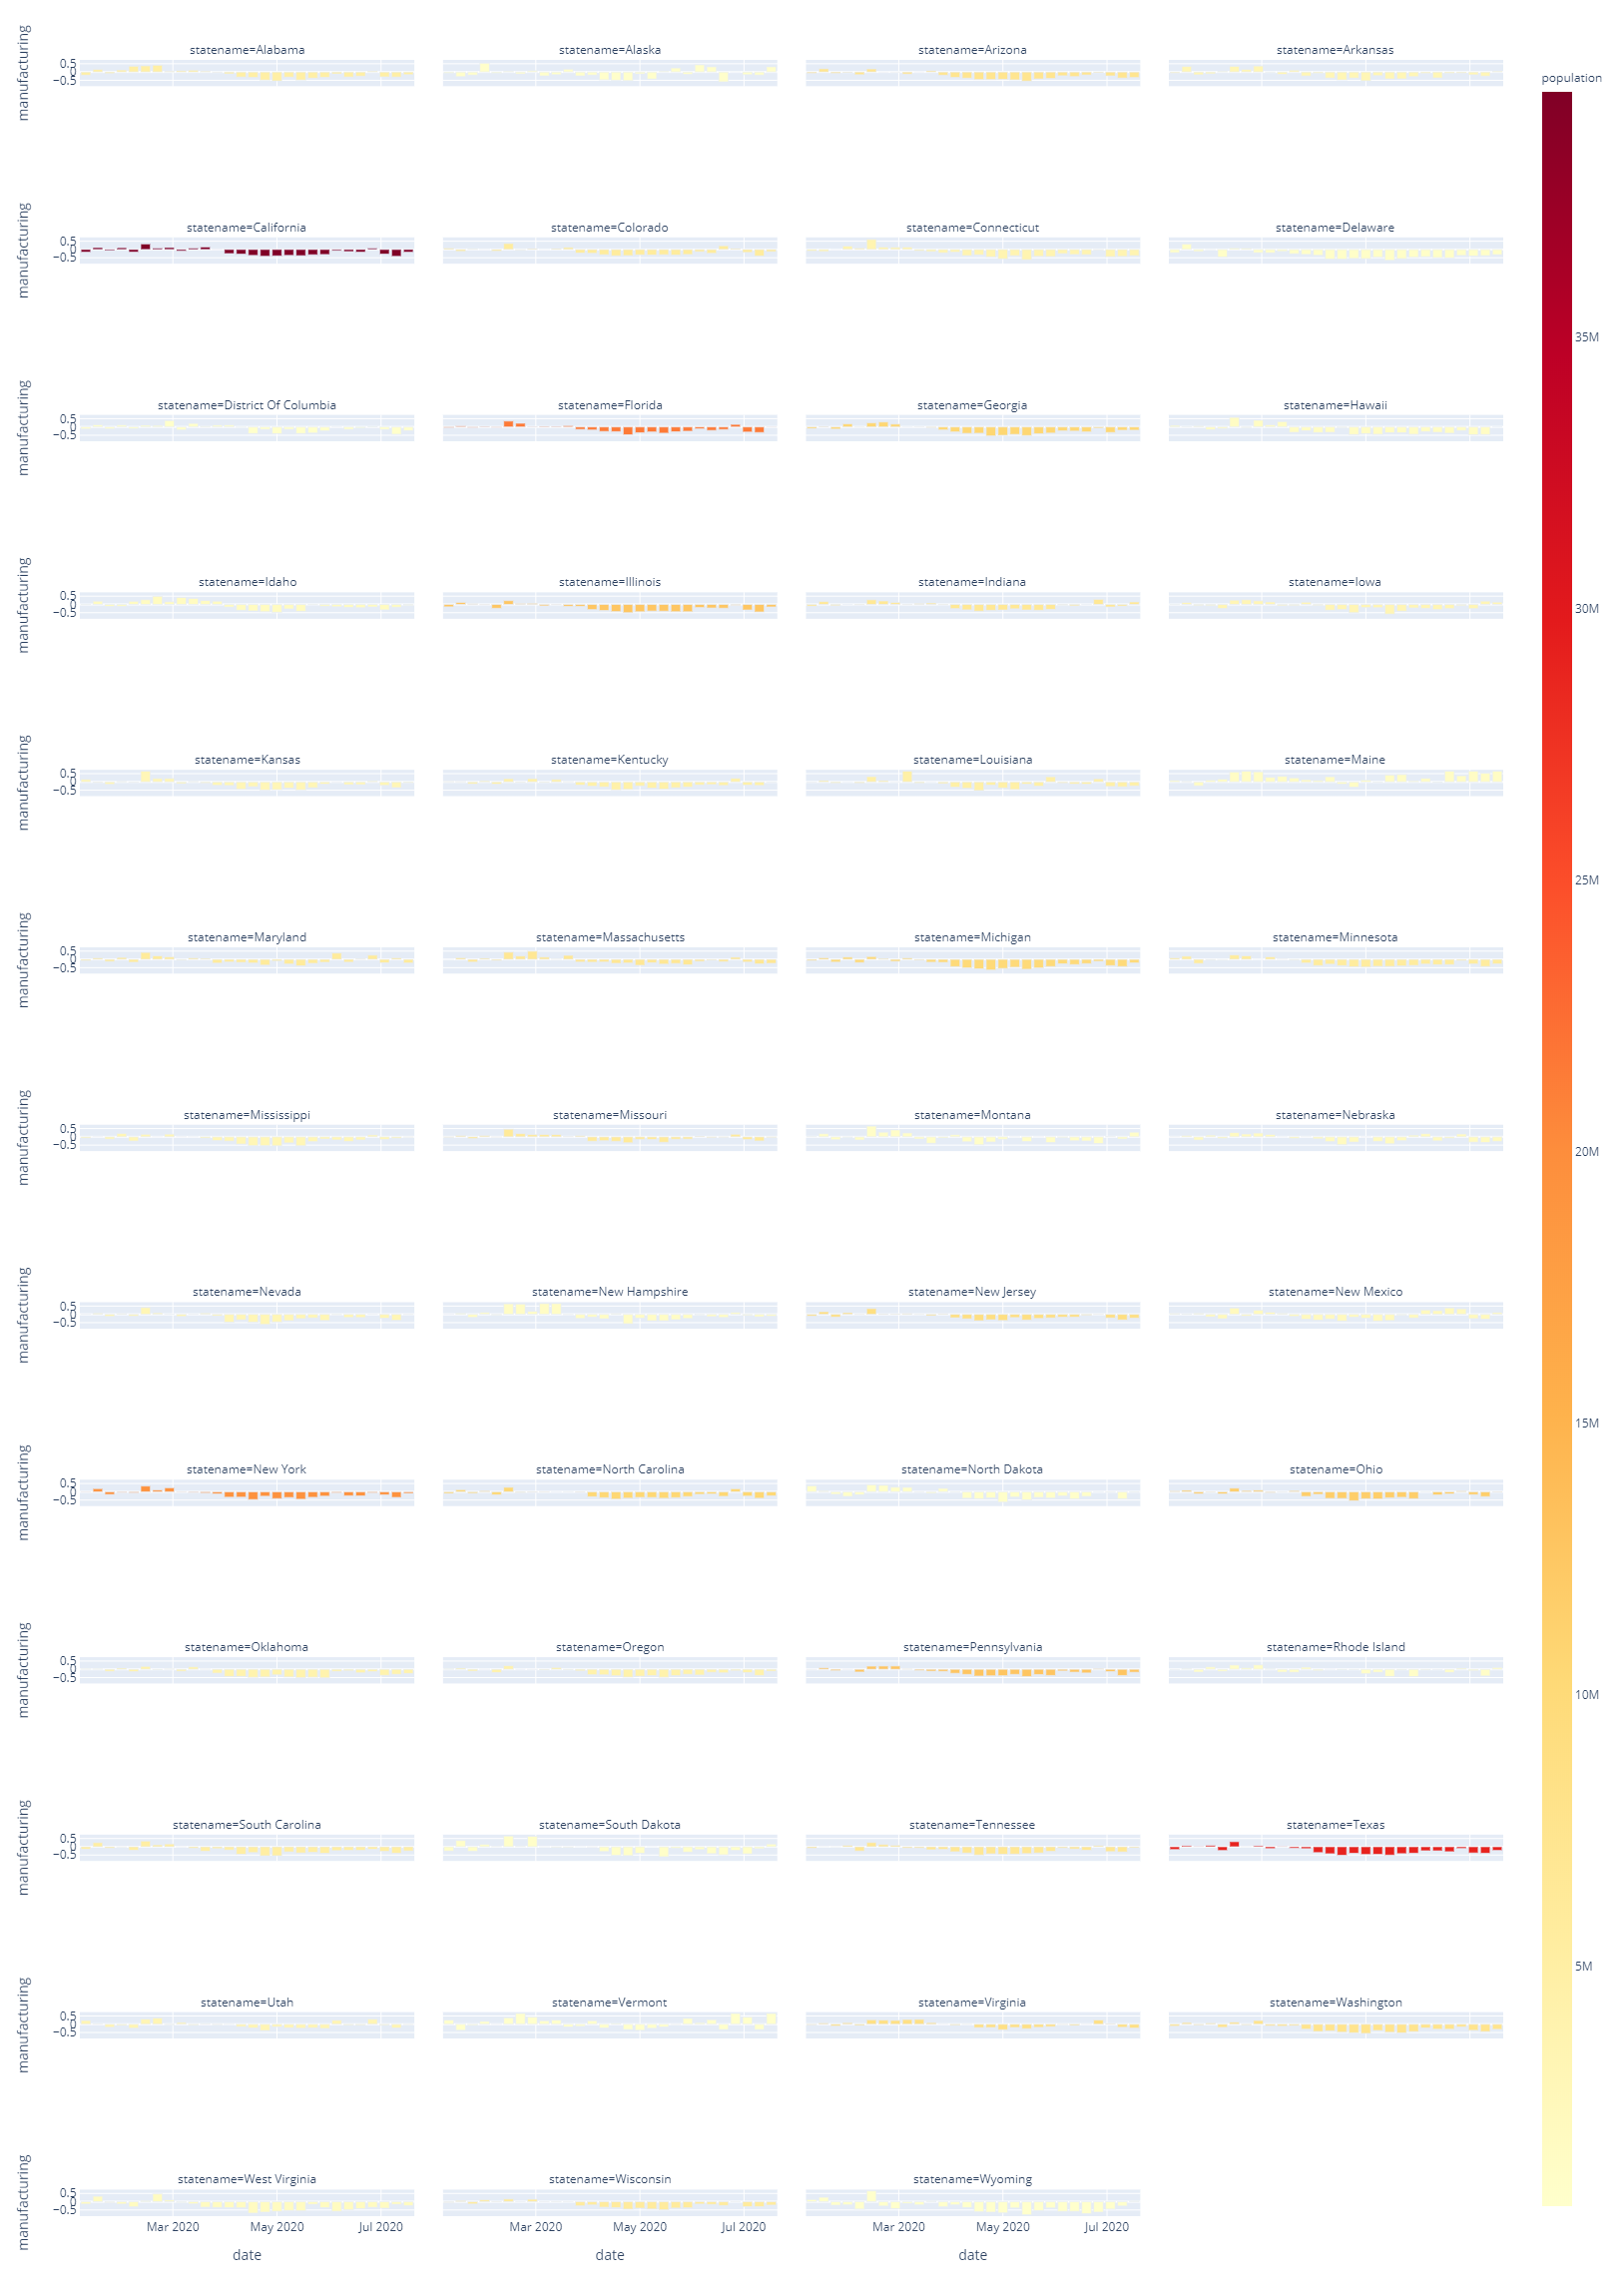

In [297]:
data = df_burnings_date_state
fig = px.bar(data, x="date", y="manufacturing",facet_col='statename', facet_col_wrap=4,height=2300,color="population",color_continuous_scale=px.colors.sequential.YlOrRd)
fig.show()

### Average level of job postings relative to January 4-31 2020 (statewise)

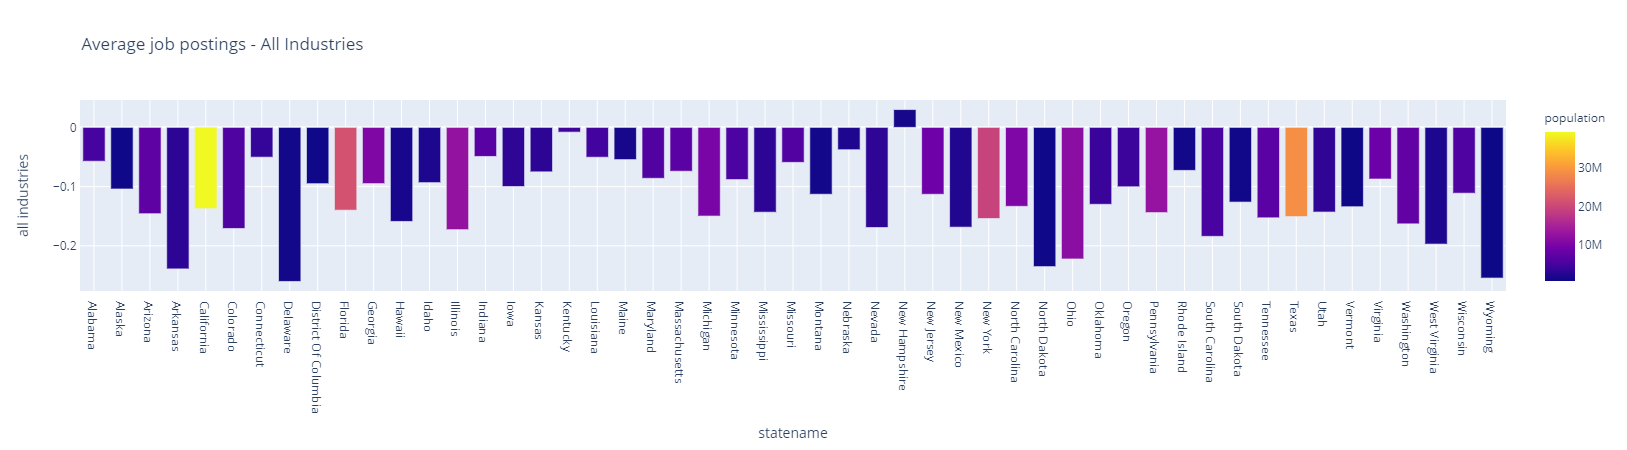

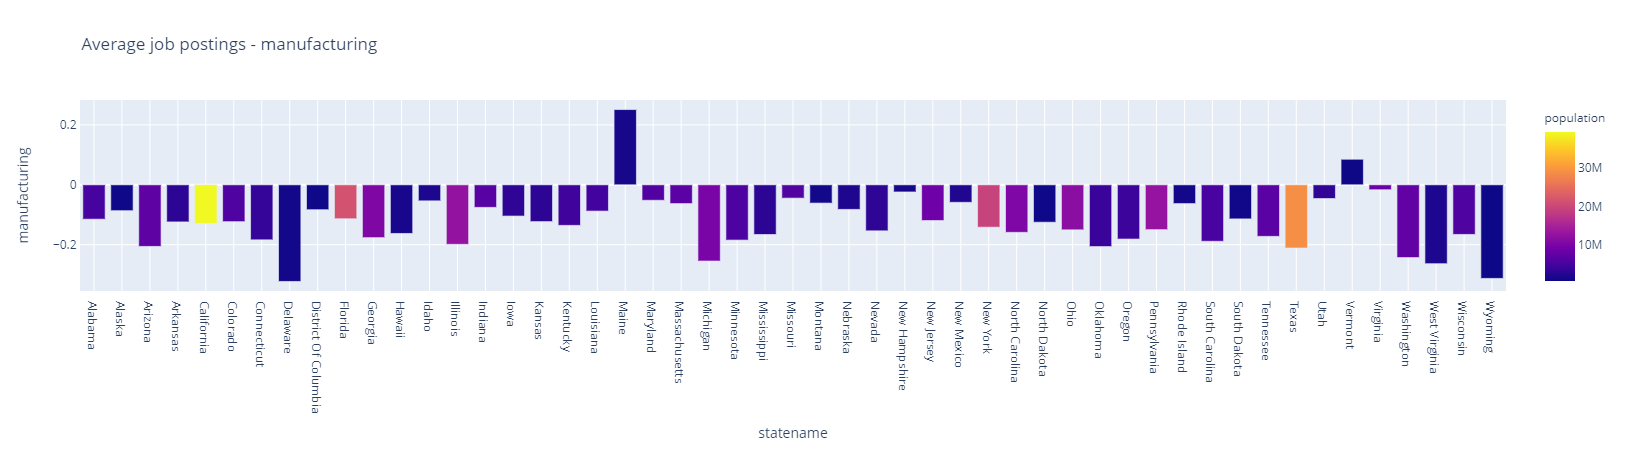

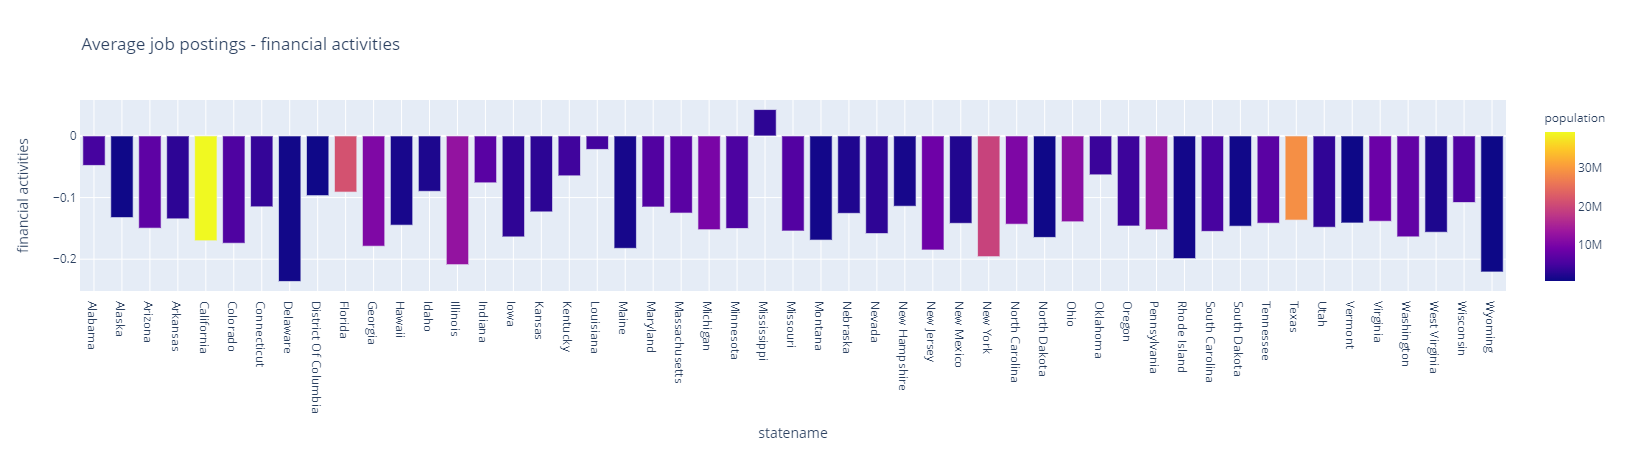

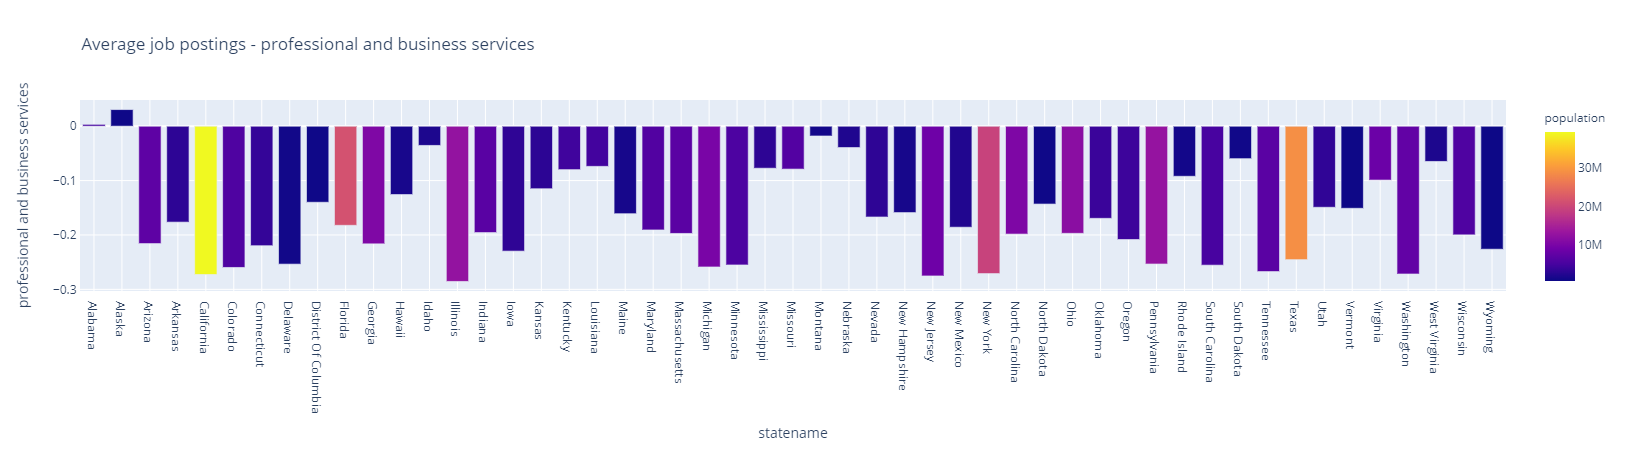

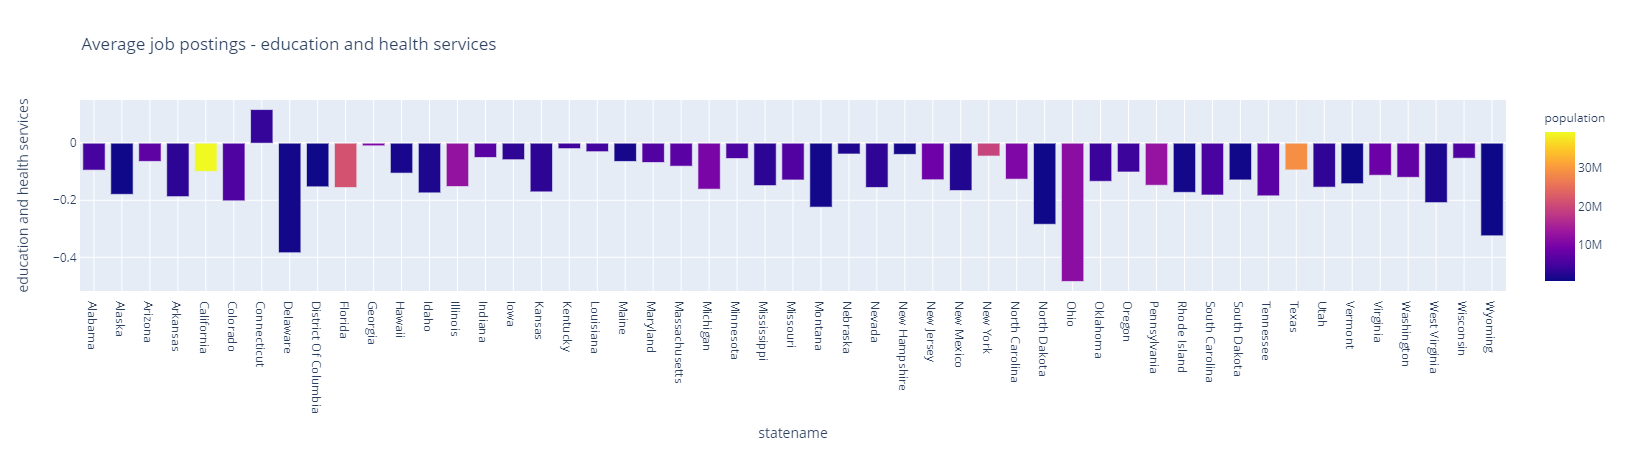

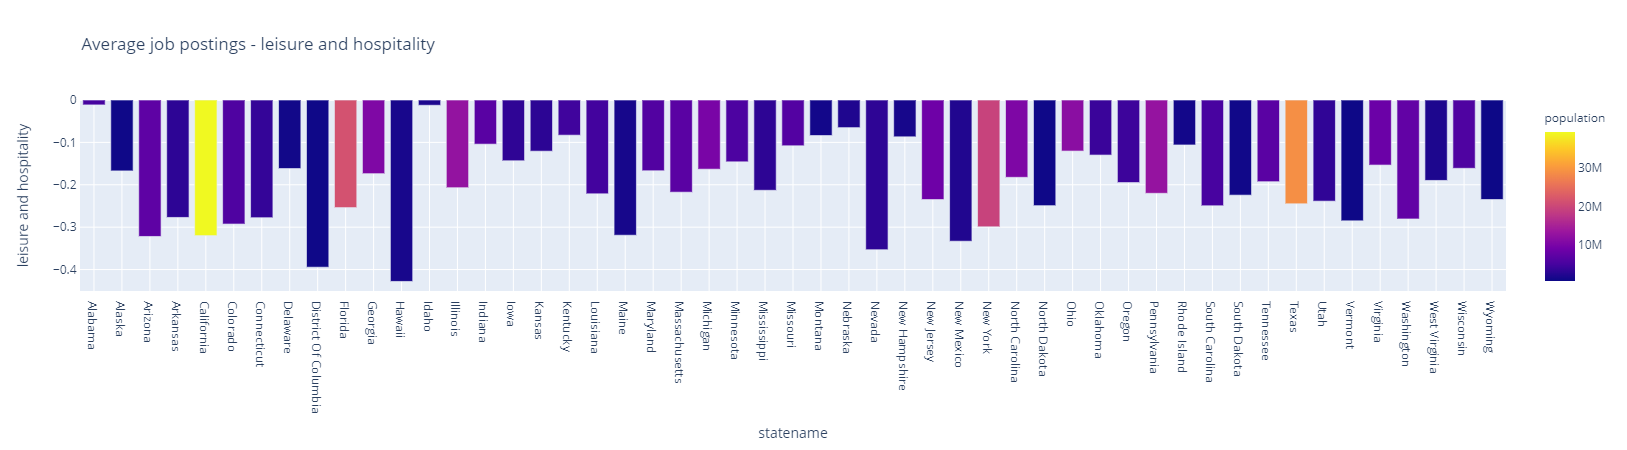

In [249]:
fig = px.bar(df_burnings_state,x='statename',y='all industries',title="Average job postings - All Industries",color='population')
fig.show()
fig = px.bar(df_burnings_state,x='statename',y='manufacturing',title="Average job postings - manufacturing",color='population')
fig.show()
fig = px.bar(df_burnings_state,x='statename',y='financial activities',title="Average job postings - financial activities",color='population')
fig.show()
fig = px.bar(df_burnings_state,x='statename',y='professional and business services',title="Average job postings - professional and business services	",color='population')
fig.show()
fig = px.bar(df_burnings_state,x='statename',y='education and health services',title="Average job postings - education and health services",color='population')
fig.show()
fig = px.bar(df_burnings_state,x='statename',y='leisure and hospitality',title="Average job postings - leisure and hospitality",color='population')
fig.show()